In [1]:
import numpy as np
from skimage import io,color
import matplotlib.pyplot as plt
import time
import math


In [2]:
#plt.close('all')

##########################
########   PART 1   ##############
########################


# functia care calculeaza imaginea integrala
def img_integrala(img,h,w,flag):
    
    img_integral = np.zeros((h,w))
    
    # PARAMETRII : imaginea,dimensiunea acesteia si un flag(1 sau 2 tip intreg) care sa 
    # semnaleze ce varianta folositi(1 sau 2)-> ambele variante treb sa duca 
    # acelasi rezultat
    # RETURN: imaginea integrala finala
    
    #VARIANTA 1(varianta clasica cu FOR)
    #HINT-1 -> puteti sa folositi .sum() din numpy adaptand mereu o fereastra
    # care pleaca din coltul dreapta-sus(0,0) si cuprinde pixelul crent
    #HINT-2 -> puteti sa gasiti o regula astfel incat sa folositi valorile calculate
    # anterior in imaginea integrala si imaginea curenta
    if(flag ==1):
        
        for i in range(h):
            for j in range(w):
                    img_integral[i,j] = np.sum(img[0:i+1,0:j+1]) 
    

    #VARIANTA 2(folosind functii din python)
    # uitati-va ce face np.cumsum() si folositi-l corespunzator

    if(flag == 2):
        img_integral = np.cumsum(img, axis=0)
        img_integral = np.cumsum(img_integral, axis=1)
        
    if(flag ==3):
        for i in range(h):
            for j in range(w):
                if(i==j==0):
                    img_integral[i,j] = img[i,j]
                elif(i==0 and j!=0):
                    img_integral[i,j] = img[i,j] + img_integral[i,j-1]
                elif(i!=0 and j==0):
                    img_integral[i,j] = img[i,j] + img_integral[i-1,j]    
                elif(i!=0 and j!=0):
                    img_integral[i,j] = img[i,j] + img_integral[i,j-1] + img_integral[i-1,j] - img_integral[i-1,j-1]
    
    return img_integral
    
#matrici de TEST
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
b=np.array([[3,2,1,1],[1,2,3,4]])

#calzulez dimensiunea pt a,b
h_a,w_a=a.shape
h_b,w_b=b.shape

img_integ_a_V1 = img_integrala(a,h_a,w_a,1)
img_integ_a_V2 = img_integrala(a,h_a,w_a,2)
img_integ_a_V3 = img_integrala(a,h_a,w_a,3)
print(img_integ_a_V1)
print(img_integ_a_V2)
print(img_integ_a_V3)

img_integ_b_V1 = img_integrala(b,h_b,w_b,1)


[[ 1.  3.  6.]
 [ 5. 12. 21.]
 [12. 27. 45.]]
[[ 1  3  6]
 [ 5 12 21]
 [12 27 45]]
[[ 1.  3.  6.]
 [ 5. 12. 21.]
 [12. 27. 45.]]


In [5]:
# citesc imaginea 'noise_img1.jpg'
img=io.imread("lab2/noise_img1.jpg")

# o transform in gray,calculez dimensionalitatea lui img

gray = color.rgb2gray(img)
h_img,w_img = gray.shape
# vreau sa verific daca am calculat corect imaginea integrala
# voi folosi ambele variante de calcul si pt a si pt b si vreau sa obtin acelasi lucru

# img_integ_a_V1=
# img_integ_a_V2=
img_integ_a_V1 = img_integrala(a,h_a,w_a,1)
img_integ_a_V2 = img_integrala(a,h_a,w_a,2)

# img_integ_b_V1=
# img_integ_b_V2=
img_integ_b_V1 = img_integrala(b,h_b,w_b,1)
img_integ_b_V2 = img_integrala(b,h_b,w_b,2)

# ar treb sa dea (T,T)
print (img_integ_a_V1==img_integ_a_V2,img_integ_b_V1==img_integ_b_V2)

# vreau sa vad cat dureaza cele 2 variante pentru o imagine
# trebuie sa completati parametrii
start1=time.time()
img_integ_img_V1=img_integrala(gray,h_img,w_img,1)
end1=time.time()
elapsed1=(end1-start1)

start2=time.time()
img_integ_img_V1=img_integrala(gray,h_img,w_img,2)
end2=time.time()
elapsed2=(end2-start2)

#print(elapsed1/elapsed2)

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]] [[ True  True  True  True]
 [ True  True  True  True]]


In [6]:
##########################
########   PART 2  ##############
########################

#calcul dreptunghi din img_integ
def suma_dreptunghi(l,c,h,w,img_integral):
    
    # PARAMETRII : perechea (l,c) pentru pixelul curent,dimensiunea imaginii,imaginea integrala
    # RETURN : Z=suma intensitatilor pixelilor din dreptunghiul ales
    if l>0 and c>0:
        A = img_integral[l-1, c-1]
        B = img_integral[l-1, w+c-1]
        C = img_integral[h+l-1, c-1]     
    elif l==0 and c>0:
        A=B=0
        C = img_integral[h-1, c-1]  
    elif l>0 and c==0:
        A=C=0
        B = img_integral[l-1, w-1] 
    else:
        A=B=C=0

    D = img_integral[h+l-1, w+c-1]
    
    Z = A+D-B-C
    
    return Z
    
    # Calculez A,B,C,D conform celor discutate folosind imag integrala calculata anterior
    # Aveti grija si la cazurile limita (daca ma aflu in anumite extremitati din imagine
    # unele zone nu pot fi calculate)
    
#verificam daca va calcula corect suma pentru dreptunghiurile alese
# primele 2 linii din a
dr1=suma_dreptunghi(0,0,2,3,img_integ_a_V1)
# [[5,6],[8,9]]
dr2=suma_dreptunghi(1,1,2,2,img_integ_a_V1)
# [[2,1],[2,3]]
dr5=suma_dreptunghi(0,1,2,2,img_integ_b_V1)

# ar treb sa fie (21,28,8)
print(dr1,dr2,dr5)

21.0 28.0 8.0


In [7]:
##########################
########   PART 3  ##############
########################

# filtrul Lee
def filt_LEE(capat,size,h,w,noise_var,img_integrala,img_integrala_patrat,img_copie):
    
    #PARAMETRII : capat,dim ferestrei,dim imaginii,img_integ pt imaginea init
    #             img_integ pt img_init la patrat, copie a imaginii initiale
    #             pt a calcula noile valori filtrate
    
    #RETURN img filtrata(img_denoise)
    
    #capat = int(np.floor(filter_size/2))
    #gray = color.rgb2gray(img)
    #ii = integral_image(gray)
    #square = gray**2;
    #ii_square = integral_image(square)
    #h, w = gray.shape
    
    #parcurgem imaginea si "plimbam" feresetrele
    for i in range(capat,h-capat):
        for j in range(capat,w-capat):
            
            # ecuatia filtrului : I_out=alpha * I_med + (1-alpha) * I
            # unde I_out - noua valoare a pixelului filtrat
            #      alpha = sqrt (noise_var/fer_var) [0,1]
            #      I_med = media pixelilor din fereastra
            #      I = pixelul original din imaginea curenta
            #      fer_var=I**2_med - I_med**2
            
            # calculez I_med**2(media pixelilor din ferastra la patrat)
            # folosind functia suma_dreptungi(dreptunghiul e fiec fereastra)
            img_med=suma_dreptunghi(i-capat,j-capat,size,size,img_integrala)/(size*size)
            img_med_patrat=img_med**2
            
            # calculez I**2_med(media pixelilor ridicati la patrat din ferastra )
            img_patrat_med=suma_dreptunghi(i-capat,j-capat,size,size,img_integrala_patrat)/(size*size)
            
            #calculez varianta ferestrei fer_var
            fer_var= img_patrat_med - img_med_patrat
            
            #ma asigur ca varianta din fereastra nu e mai mare ca cea a zg
            #altfel ar exista unele sanse ca alpha sa fie > 1, dar el apartine [0,1]
            fer_var = max(fer_var,noise_var)
            
            #calculez alpha conform formulei cu radical
            alpha= math.sqrt(noise_var/fer_var)
            
            #calculez noua valoare a pixelului filtrat
            img_denoise[i,j] = alpha * img_med + (1-alpha) * img_copie[i,j]
  
    return img_denoise

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x2cf7e7e35c0>)

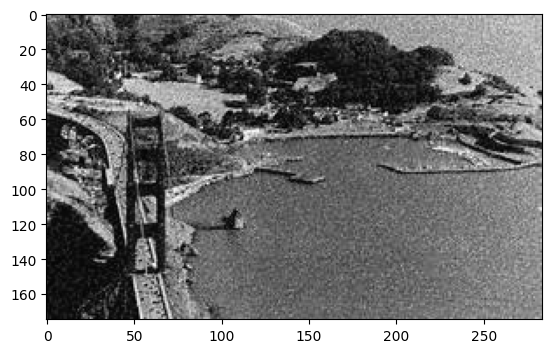

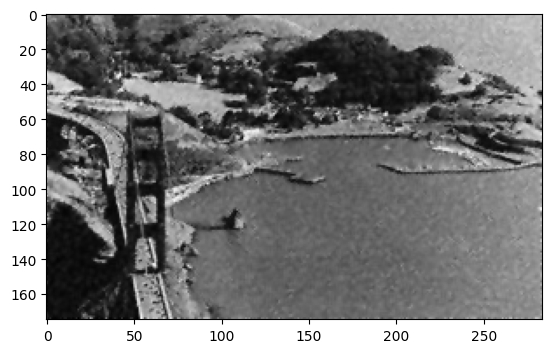

In [9]:
#citim imag initiala cu zg gauss, o transf in gray, aflu dim si o afisez
img_Lee=io.imread('lab2/noise_img1.jpg')
img_Lee=color.rgb2gray(img_Lee)
plt.figure(),plt.imshow(img_Lee,cmap='gray') 
h,w=img_Lee.shape

#aflu varianta zgomotului
# folosesc functia .var() din numpy pe o zona uniforma din img_Lee
noise_var=img_Lee[100:,140:220].var()

# fac o copie a imaginii in care sa pun pixelii filtrati
img_denoise=img_Lee.copy()

#calculez imaginea integrala pentru img initiala si img initiala la patrat
# folosind fctia scrisa anterior
img_integ_init=img_integrala(img_Lee,h,w,2)
img_integ_patrat=img_integrala(img_Lee**2,h,w,2)

# dim ferestrei de filtrare(3 pt 3*3,5 pt (5*5),etc)
size=3

# generalizarea numarului de linii si coloane care se pierd 
# in functie de dim ferestrei
capat=int(np.floor(size/2))

#returnez imaginea filtrata si o afisez
img_denoise=filt_LEE(capat,size,h,w,noise_var,img_integ_init,img_integ_patrat,img_denoise)
plt.figure(),plt.imshow(img_denoise,cmap='gray')     